# **Задача классификации удовлетворенности пассажиров авиакомпании**
# **0. Описание задачи**
Данный набор данных содержит опрос об <b>удовлетворенности авиапассажиров</b>.

Необходимо предсказать, к какому из <b>двух</b> уровней удовлетворенности авиакомпанией принадлежит пассажир:
<ol>
    <li><em>Удовлетворенность</em></li>
    <li><em>Нейтральность или неудовлетворенность</em></li>
</ol>

***

Датасет: https://www.kaggle.com/teejmahal20/airline-passenger-satisfaction?select=train.csv

***


Имеется следующий набор данных:

<ol>
    <li><b>Пол</b>: мужской или женский</li>
    <li><b>Тип пассажира</b>: постоянный или непостоянный клиент авиакомпании</li>
    <li><b>Возраст</b>: фактический возраст пассажира</li>
    <li><b>Тип путешествия</b>: цель полета поссажира (личное путешествие или деловое)</li>
    <li><b>Класс обслуживания</b>: бизнес, эконом, эконом плюс</li>
    <li><b>Расстояние полета</b></li>
    <li><b>Услуга Wi-Fi на борту</b>: уровень удовлетворенности услугой Wi-Fi на борту (0: без оценки; 1-5)</li>
    <li><b>Удобное время отправления/прибытия</b>: уровень удовлетворенности временем отправления/прибытия (0: без оценки; 1-5)</li>
    <li><b>Легкость онлайн-бронирования</b>: уровень удовлетворенности онлайн-бронированием (0: без оценки; 1-5)</li>
    <li><b>Расположение выхода</b>: уровень удовлетворенности местоположением выхода (0: без оценки; 1-5)</li>
    <li><b>Еда и напитки</b>: уровень удовлетворенности едой и напитками (0: без оценки; 1-5)</li>
    <li><b>Онлайн-посадка</b>: уровень удовлетворенности онлайн-посадкой (0: без оценки; 1-5)</li>
    <li><b>Комфортность пассажирского кресла</b>: уровень удовлетворенности креслом (0: без оценки; 1-5)</li>
    <li><b>Развлечения в полете</b>: уровень удовлетворенности развлечениями в полете (0: без оценки; 1-5)</li>
    <li><b>Бортовое обслуживание</b>: уровень удовлетворенности бортовым обслуживанием (0: без оценки; 1-5)</li>
    <li><b>Свободное пространство для ног</b>: уровень удовлетворенности свободным пространством для ног (0: без оценки; 1-5)</li>
    <li><b>Транспортировка багажа</b>: уровень удовлетворенности транспортировкой багажа (0: без оценки; 1-5)</li>
    <li><b>Служба регистрации</b>: уровень удовлетворенности службой регистрации (0: без оценки; 1-5)</li>
    <li><b>Обслуживание в полете</b>: уровень удовлетворенности обслуживанием в полете (0: без оценки; 1-5)</li>
    <li><b>Чистота</b>: уровень удовлетворенности чистотой (0: без оценки; 1-5)</li>
    <li><b>Задержка отправления в минутах</b>: задержка в минутах при отправлении</li>
    <l


# **1. Чтение данных**

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
url = "https://raw.githubusercontent.com/dbakalina/ml_winter/main/datasets/train.csv"
data = pd.read_csv(url)

In [4]:
data.shape

(103904, 25)

Видно, что у нас 25 признаков и число данных 103904.

Первые и последние значения из таблицы данных:

In [5]:
data

Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0                0   70172    Male     Loyal Customer   13  Personal Travel   
1                1    5047    Male  disloyal Customer   25  Business travel   
2                2  110028  Female     Loyal Customer   26  Business travel   
3                3   24026  Female     Loyal Customer   25  Business travel   
4                4  119299    Male     Loyal Customer   61  Business travel   
...            ...     ...     ...                ...  ...              ...   
103899      103899   94171  Female  disloyal Customer   23  Business travel   
103900      103900   73097    Male     Loyal Customer   49  Business travel   
103901      103901   68825    Male  disloyal Customer   30  Business travel   
103902      103902   54173  Female  disloyal Customer   22  Business travel   
103903      103903   62567    Male     Loyal Customer   27  Business travel   

           Class  Flight Distance  Inflight wifi service  \
0       Eco Plus              460                      3   
1       Business              235                      3   
2       Business             1142                      2   
3       Business              562                      2   
4       Business              214                      3   
...          ...              ...                    ...   
103899       Eco              192                      2   
103900  Business             2347                      4   
103901  Business             1995                      1   
103902       Eco             1000                      1   
103903  Business             1723                      1   

        Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                       4  ...                       5   
1                                       2  ...                       1   
2                                       2  ...                       5   
3                                       5  ...                       2   
4                                       3  ...                       3   
...                                   ...  ...                     ...   
103899                                  1  ...                       2   
103900                                  4  ...                       5   
103901                                  1  ...                       4   
103902                                  1  ...                       1   
103903                                  3  ...                       1   

        On-board service  Leg room service  Baggage handling  Checkin service  \
0                      4                 3                 4                4   
1                      1                 5                 3                1   
2                      4                 3                 4                4   
3                      2                 5                 3                1   
4                      3                 4                 4                3   
...                  ...               ...               ...              ...   
103899                 3                 1                 4                2   
103900                 5                 5                 5                5   
103901                 3                 2                 4                5   
103902                 4                 5                 1                5   
103903                 1                 1                 4                4   

        Inflight service  Cleanliness  Departure Delay in Minutes  \
0                      5            5                          25   
1                      4            1                           1   
2                      4            5                           0   
3                      4            2                          11   
4                      3            3                           0   
...                  ...          ...                         

Каждая строка соответсвует одному пассажиру.
Столбцы (признаки) - информация о пассажирах авиакомпании

Более подробное описание данных датасета:

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

Видно:

<ol>
    <li>В столбце с признаком Arrival Delay in Minutesеть пропущенные значения ( 310 значений).</li>
    <li> Первые два признака не влияют на классификацию, поэтому их можно не учитывать при решении задачи.</li>
    <li> Многие столбцы содержат категориальные значения, но имеют тип 'object' или 'int64'. Заменим данный тип на специальный, предназначенный для хранения категориальных значений.</li>
</ol>

In [7]:
data = data.drop(data.iloc[:,[0, 1]], axis = 1)

In [8]:
categorical_indexes = [0, 1, 3, 4] + list(range(6, 20))
data.iloc[:,categorical_indexes] = data.iloc[:,categorical_indexes].astype('category')

Теперь будем работать с таким набором признаков.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Gender                             103904 non-null  category
 1   Customer Type                      103904 non-null  category
 2   Age                                103904 non-null  int64   
 3   Type of Travel                     103904 non-null  category
 4   Class                              103904 non-null  category
 5   Flight Distance                    103904 non-null  int64   
 6   Inflight wifi service              103904 non-null  category
 7   Departure/Arrival time convenient  103904 non-null  category
 8   Ease of Online booking             103904 non-null  category
 9   Gate location                      103904 non-null  category
 10  Food and drink                     103904 non-null  category
 11  Online boarding           

# **2. Визуализация данных и вычисление основных характеристик**

Для получения основных характрестик вызовем функцию describe:

In [10]:
data.describe()

Age  Flight Distance  Departure Delay in Minutes  \
count  103904.000000    103904.000000               103904.000000   
mean       39.379706      1189.448375                   14.815618   
std        15.114964       997.147281                   38.230901   
min         7.000000        31.000000                    0.000000   
25%        27.000000       414.000000                    0.000000   
50%        40.000000       843.000000                    0.000000   
75%        51.000000      1743.000000                   12.000000   
max        85.000000      4983.000000                 1592.000000   

       Arrival Delay in Minutes  
count             103594.000000  
mean                  15.178678  
std                   38.698682  
min                    0.000000  
25%                    0.000000  
50%                    0.000000  
75%                   13.000000  
max                 1584.000000

Для каждого категориального признака получим общее количество значений, количество уникальных значений, наиболее часто встречающийся элемент и общее количество таких элементов:

In [11]:
data.describe(include = ['category'])

Gender   Customer Type   Type of Travel     Class  \
count   103904          103904           103904    103904   
unique       2               2                2         3   
top     Female  Loyal Customer  Business travel  Business   
freq     52727           84923            71655     49665   

        Inflight wifi service  Departure/Arrival time convenient  \
count                  103904                             103904   
unique                      6                                  6   
top                         3                                  4   
freq                    25868                              25546   

        Ease of Online booking  Gate location  Food and drink  \
count                   103904         103904          103904   
unique                       6              6               6   
top                          3              3               4   
freq                     24449          28577           24359   

        Online boarding  Seat comfort  Inflight entertainment  \
count            103904        103904                  103904   
unique                6             6                       6   
top                   4             4                       4   
freq              30762         31765                   29423   

        On-board service  Leg room service  Baggage handling  Checkin service  \
count             103904            103904            103904           103904   
unique                 6                 6                 5                6   
top                    4                 4                 4                4   
freq               30867             28789             37383            29055   

        Inflight service  Cleanliness  
count             103904       103904  
unique                 6            6  
top                    4            4  
freq               37945        27179

Как видно из следующего графика, распределение целевой переменной несбалансированно, но приближено к сбалансированному:

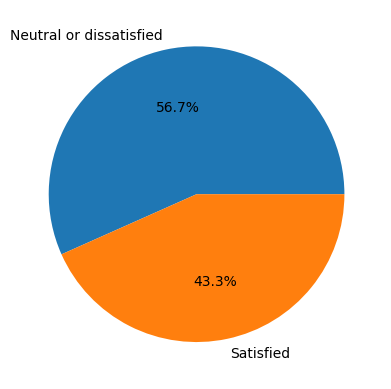

In [13]:
plt.pie(data.satisfaction.value_counts(), labels = ["Neutral or dissatisfied", "Satisfied"], autopct = '%1.1f%%')
pass

Построим матрицу корреляции для числовых характеристик и посмотрим есть ли корреляция между какими-либо характеристиками:

In [14]:
corr_mat = data.corr()
corr_mat

Age  Flight Distance  \
Age                         1.000000         0.099461   
Flight Distance             0.099461         1.000000   
Departure Delay in Minutes -0.010152         0.002158   
Arrival Delay in Minutes   -0.012147        -0.002426   

                            Departure Delay in Minutes  \
Age                                          -0.010152   
Flight Distance                               0.002158   
Departure Delay in Minutes                    1.000000   
Arrival Delay in Minutes                      0.965481   

                            Arrival Delay in Minutes  
Age                                        -0.012147  
Flight Distance                            -0.002426  
Departure Delay in Minutes                  0.965481  
Arrival Delay in Minutes                    1.000000

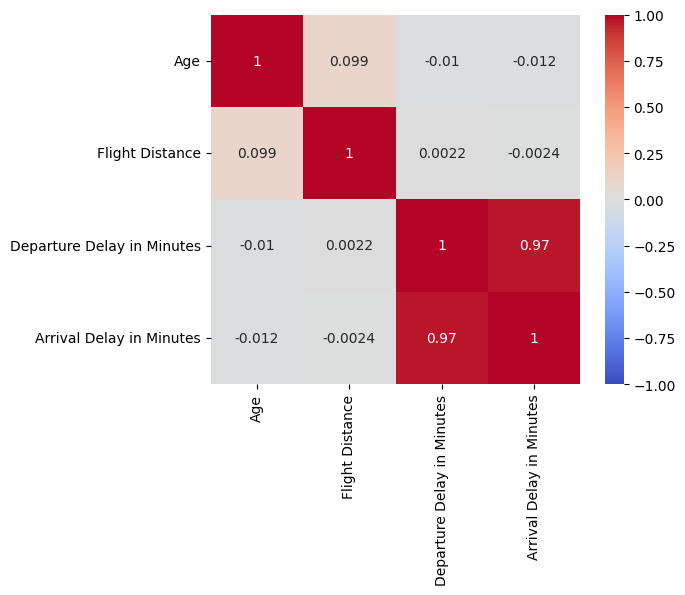

In [16]:
sns.heatmap(corr_mat, square=True, annot=True, cmap='coolwarm', vmin=-1.0, vmax=1.0)
pass

Можно заметить, что между признаками **Задержка отправления в минутах** и **Задержка прибытия в минутах** наблюдается большая корреляция.

Построим диаграмму рассеивания для данных признаков:

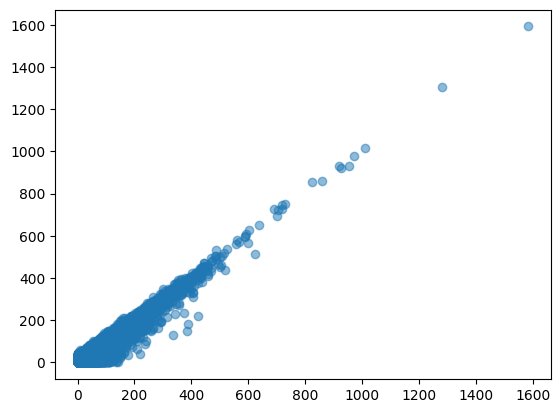

In [18]:
plt.scatter(data['Arrival Delay in Minutes'], data['Departure Delay in Minutes'], alpha = 0.4)


Из графика видно, наблюдается линейная звивисимость между этими признакми.

Полученные результаты являются вполне логичными и объяснимыми с точки зрения предметной области: если рейс клиентов авиакомпании при отправлении был задержан на некоторое количество времени, то примерно на такое же количество времени рейс задержится при посадке (при условии, что скорость самолета будеть постоянной во время полета).

Выберем категориальные признаки и построим круговые диаграммы :

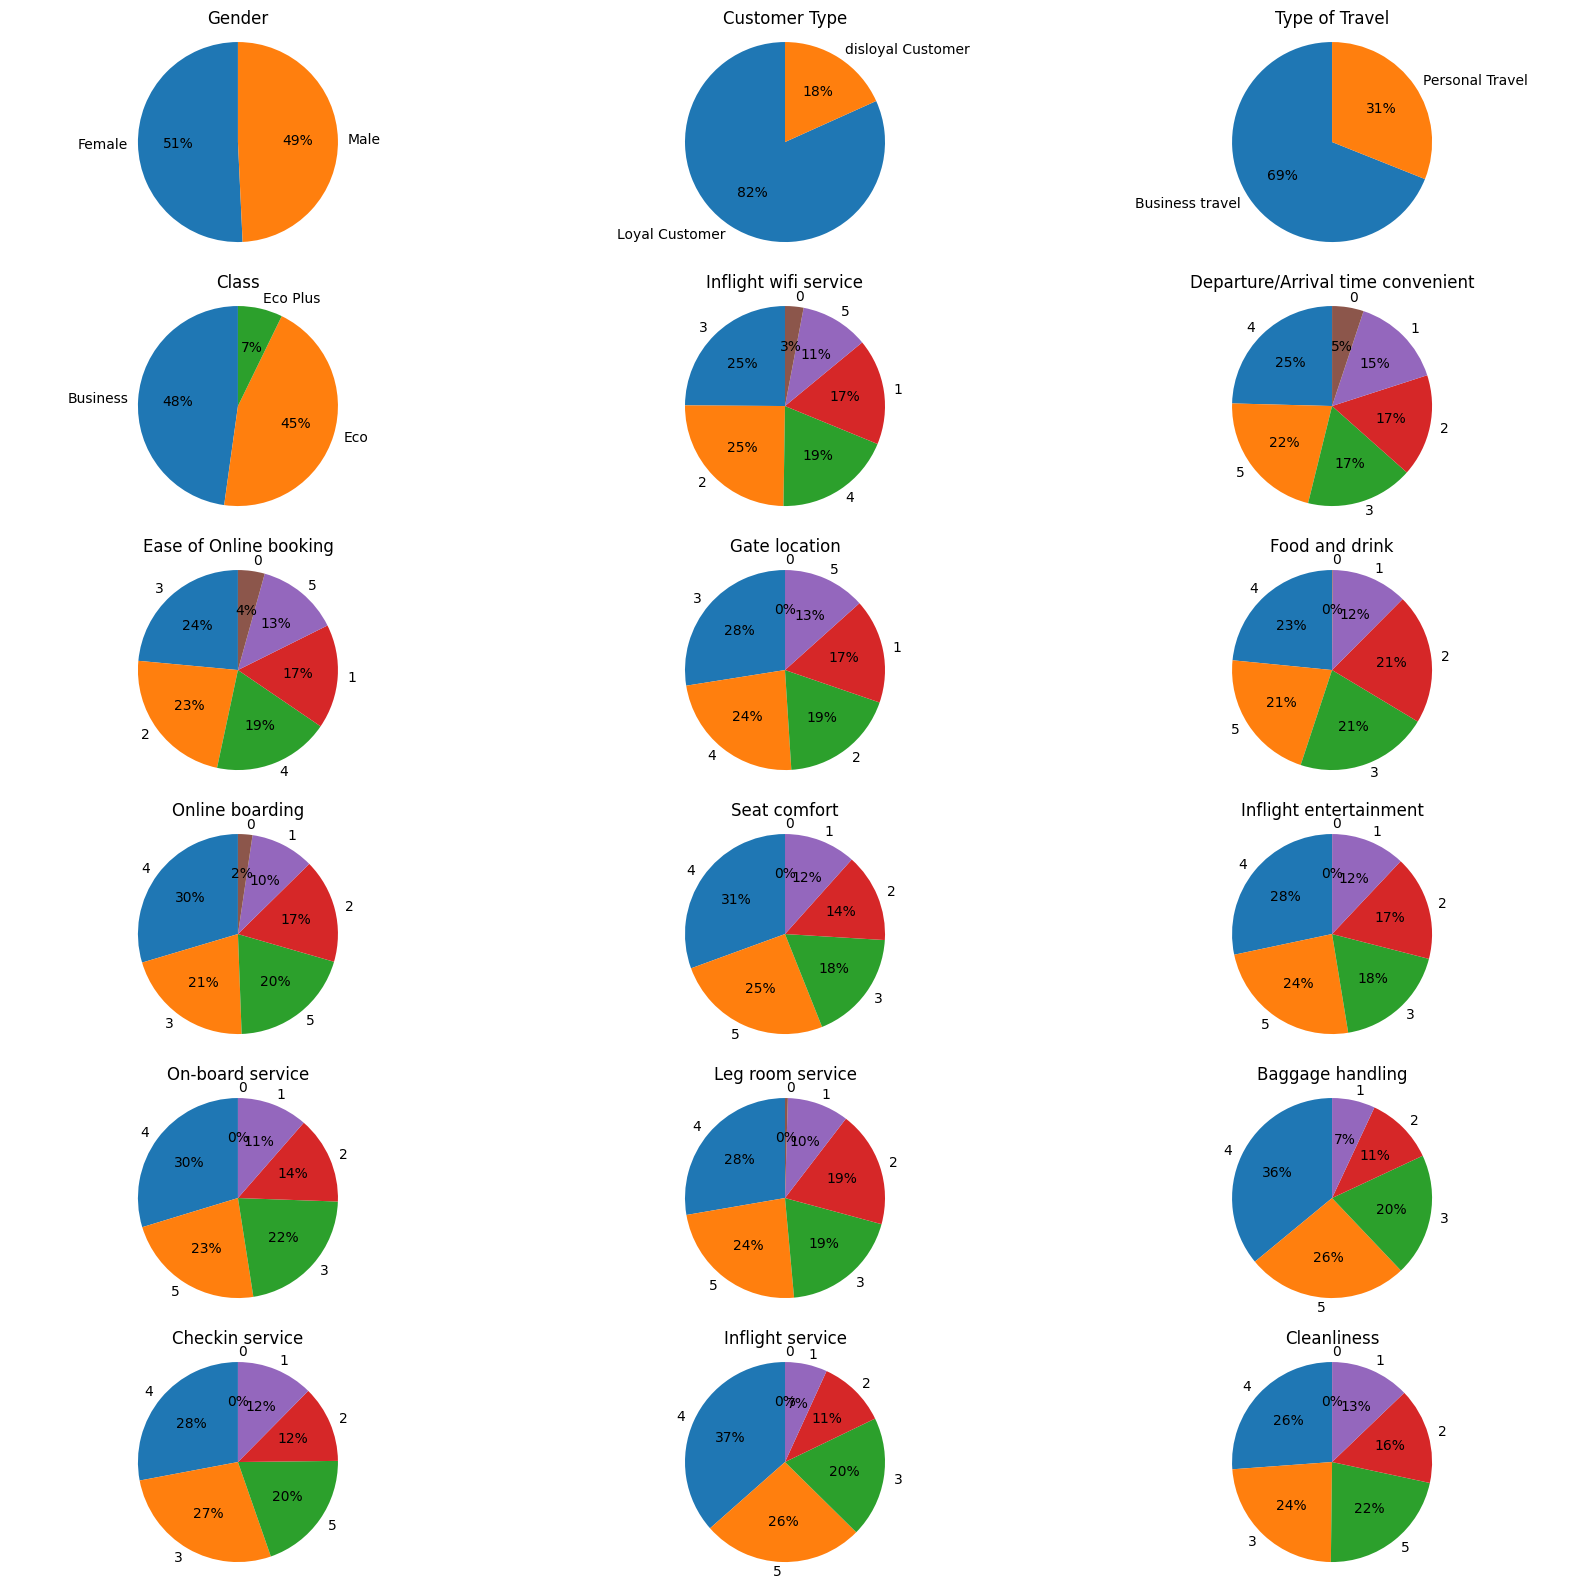

In [20]:
categ = data.iloc[:,categorical_indexes]
fig, axes = plt.subplots(6, 3, figsize = (20, 20))
for i, col in enumerate(categ):
    column_values = data[col].value_counts()
    labels = column_values.index
    sizes = column_values.values
    axes[i//3, i%3].pie(sizes, labels = labels, autopct = '%1.0f%%', startangle = 90)
    axes[i//3, i%3].axis('equal')
    axes[i//3, i%3].set_title(col)
plt.show()

По данным диаграммам можно сделать следующие выводы:
<ul>
    <li>Количество мужчин и женщин примерно одинаковое</li>
    <li>Значительное большинство клиентов авиакомпании являются постоянными</li>
    <li>Примерно половина пассажиров находилась в бизнес-классе</li>
    <li>Более 60% пассажиров остались довольны сервисом по транспортировке багажа</li>
    <li>Большая часть клиентов совершили перелет ради деловой встречи, а не по личным делам</li>
    <li>Более 50% пассажирам было удобно сидеть на их креслах</li>
</ul>

Построим бокс-диаграммы и посмотрим, есть ли выбросы для каких-либо переменных.

<Axes: xlabel='Age', ylabel='Count'>

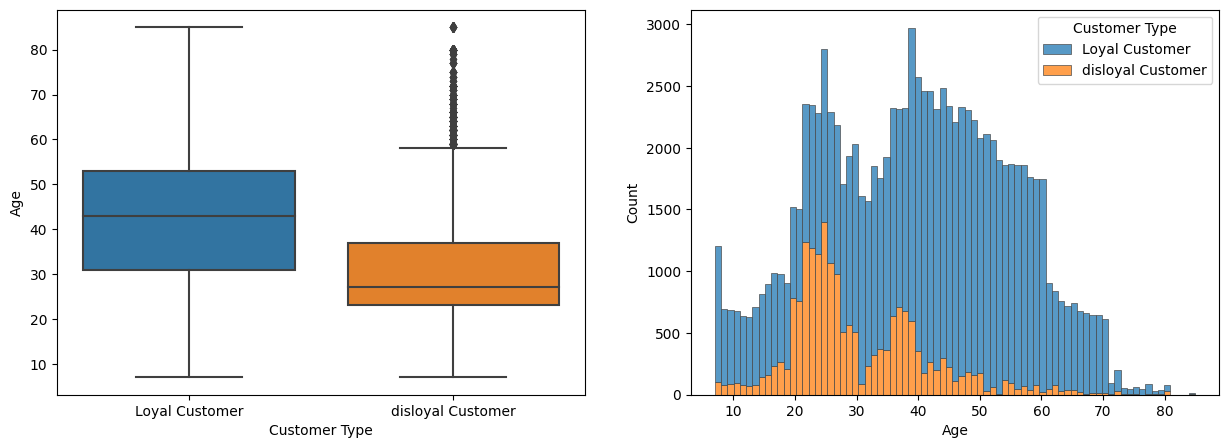

In [22]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "Customer Type", y = "Age", data = data, ax = ax[0])
sns.histplot(data, x = "Age", hue = "Customer Type", multiple = "stack", edgecolor = ".3", linewidth = .5, ax = ax[1])

По данной бокс-диаграмме можно сделать вывод о том, что большинство постоянных клиентов авиакомпании находятся в возрасте между 30 и 50 годами (в среднем их возраст чуть больше 40 лет).

Возрастной диапазон непостоянных клиентов немного меньше (от 25 до 40 лет, в среднем - чуть меньше 30).

<Axes: xlabel='Age', ylabel='Count'>

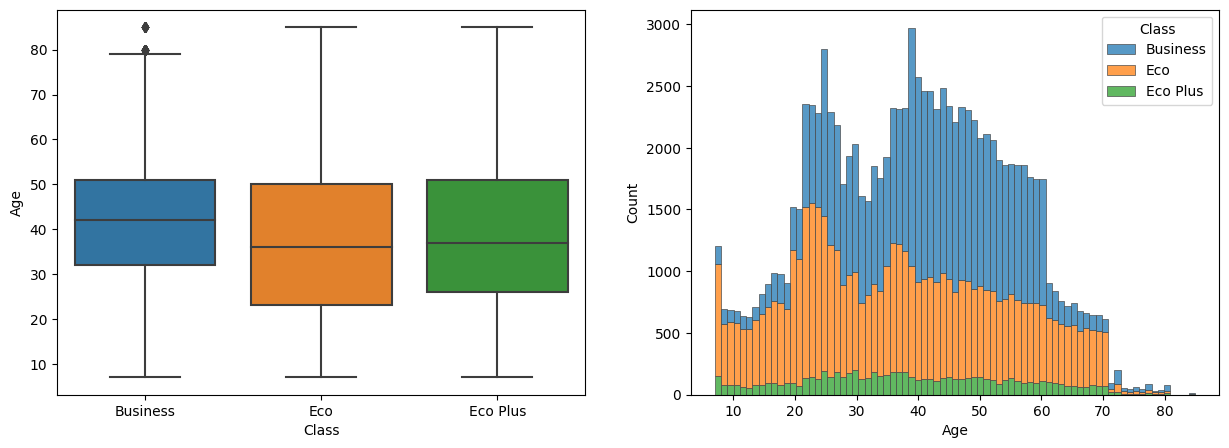

In [23]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "Class", y = "Age", data = data, ax = ax[0])
sns.histplot(data, x = "Age", hue = "Class", multiple = "stack", edgecolor = ".3", linewidth = .5, ax = ax[1])

Видно, что в среднем возрастной диапазон тех клиентов, которые путешествуют в бизнесс-классе, совпадает с возрастным диапазоном постоянных клиентов. На основании этого наблюдения можно предположить, что постоянные клиенты в основном летают бизнес-классом.

<Axes: xlabel='Flight Distance', ylabel='Count'>

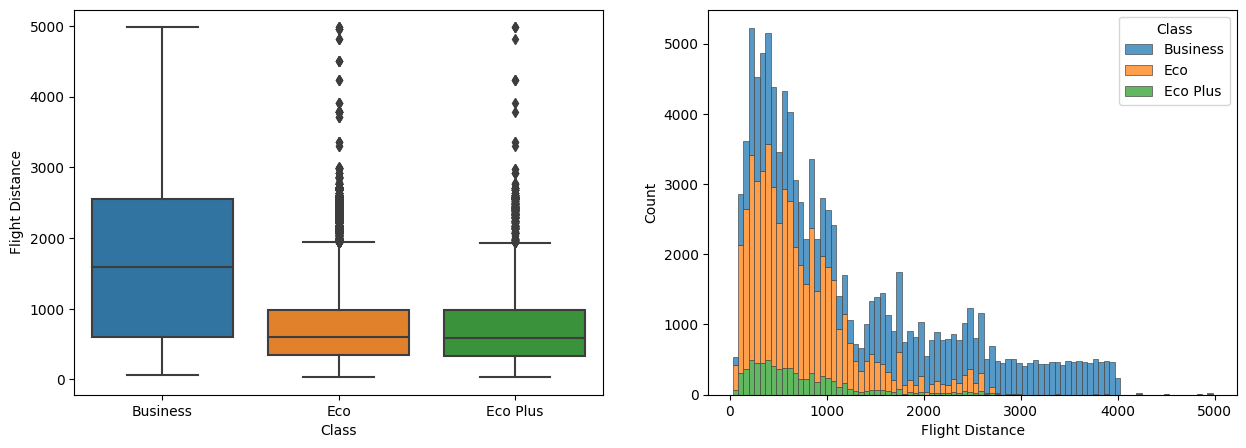

In [24]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "Class", y = "Flight Distance", data = data, ax = ax[0])
sns.histplot(data, x = "Flight Distance", hue = "Class", multiple = "stack", edgecolor = ".3", linewidth = .5, ax = ax[1])

Можно сделать следующий вывод, что клиенты, которые совершают полет на длительное расстояние, в основном летают в бизнес-классе</b>.

<Axes: xlabel='Flight Distance', ylabel='Count'>

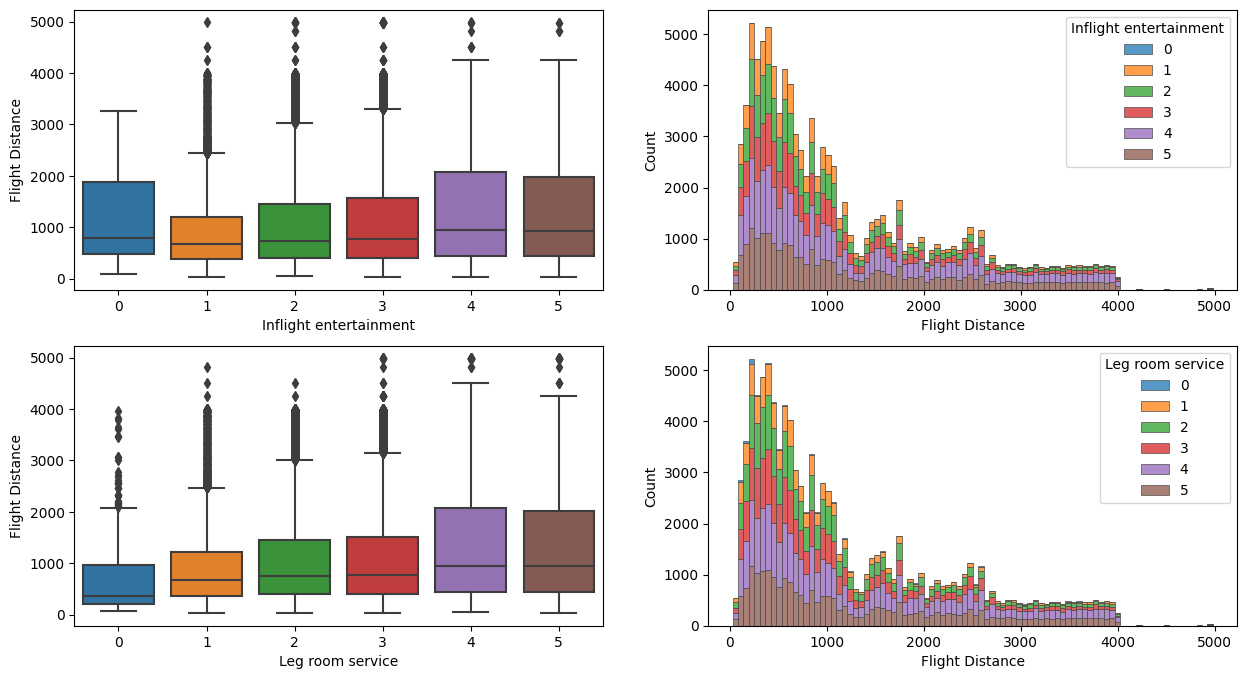

In [25]:
f, ax = plt.subplots(2, 2, figsize = (15,8))
sns.boxplot(x = "Inflight entertainment", y = "Flight Distance", data = data, ax = ax[0, 0])
sns.histplot(data, x = "Flight Distance", hue = "Inflight entertainment", multiple = "stack", edgecolor = ".3", linewidth = .5, ax = ax[0, 1])
sns.boxplot(x = "Leg room service", y = "Flight Distance", data = data, ax = ax[1, 0])
sns.histplot(data, x = "Flight Distance", hue = "Leg room service", multiple = "stack", edgecolor = ".3", linewidth = .5, ax = ax[1, 1])

Можно увидеть следующую зависимость: чем большее расстояние пассажир самолета преодолевает, тем он будет более доволен развлечениями во время перелета и дополнительным пространством для ног (в среднем).

Рассмотрим графики зависимостей некоторых категориальных признаков от признака, по которому будем проводить классификацию:

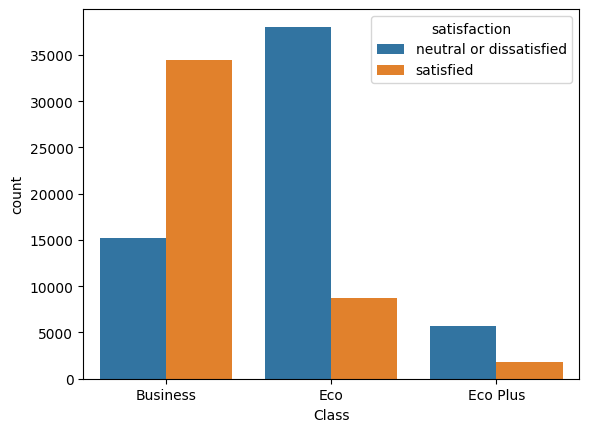

In [27]:
sns.countplot(x = 'Class', hue = 'satisfaction', data = data)
plt.show()

Из графика видно, что большинство пассажиров, совершивших перелет в эконом плюс или эконом классе, остались недовольны полетом,в то время как, пассажиры, летевшие бизнес-классом, остались довольными.

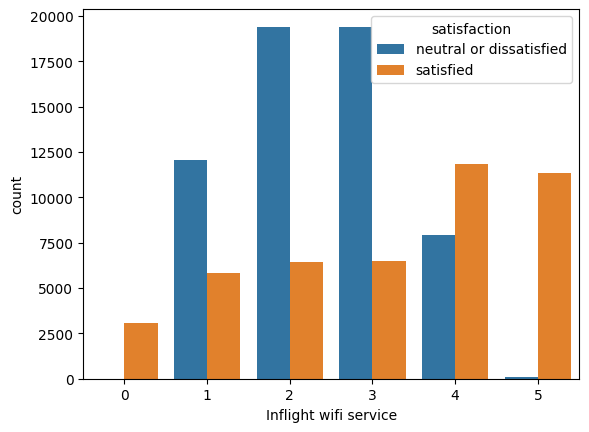

In [28]:
sns.countplot(x = 'Inflight wifi service', hue = 'satisfaction', data = data)
plt.show()

По данному графику видно, что практически все пассажиры, которые оценили Wi-Fi сервис на 5 из 5 баллов, остались довольны полетом.

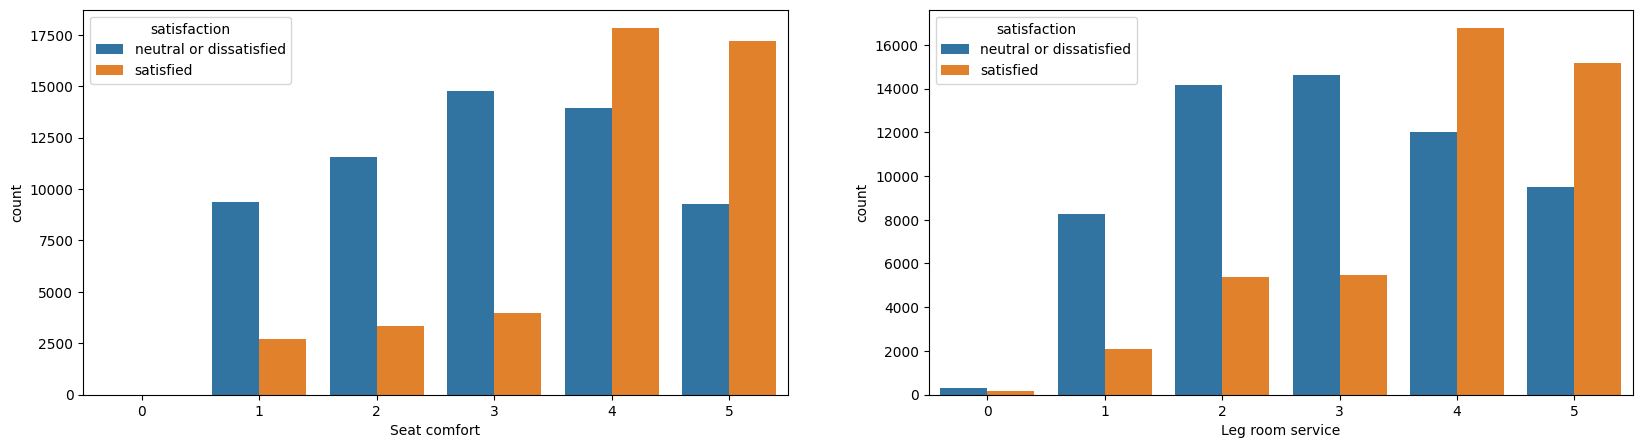

In [29]:
f, ax = plt.subplots(1, 2, figsize = (20,5))
sns.countplot(x = 'Seat comfort', hue = 'satisfaction', data = data,ax = ax[0])
sns.countplot(x = 'Leg room service', hue = 'satisfaction', data = data, ax = ax[1])
plt.show()

Можно сделать следующий вывод: большинство пассажиров, которые положительно оценили удобство кресел и дополнительное свободное место для ног, остались довольны полетом.

# **3. Обработка пропущенных значений (или убедиться, что их нет)**

Посмотрим, сколько же незаполненных ячеек имеется в каждом из столбцов:

In [30]:
data.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

Заполним пропущенные значения в столбцах медианами:

In [31]:
data['Arrival Delay in Minutes'].fillna(data['Arrival Delay in Minutes'].median(axis = 0), inplace = True)

In [32]:
data.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [33]:
data.describe()

Age  Flight Distance  Departure Delay in Minutes  \
count  103904.000000    103904.000000               103904.000000   
mean       39.379706      1189.448375                   14.815618   
std        15.114964       997.147281                   38.230901   
min         7.000000        31.000000                    0.000000   
25%        27.000000       414.000000                    0.000000   
50%        40.000000       843.000000                    0.000000   
75%        51.000000      1743.000000                   12.000000   
max        85.000000      4983.000000                 1592.000000   

       Arrival Delay in Minutes  
count             103904.000000  
mean                  15.133392  
std                   38.649776  
min                    0.000000  
25%                    0.000000  
50%                    0.000000  
75%                   13.000000  
max                 1584.000000

Пропущенных значений больше нет.

# **4. Обработка категориальных признаков**

Разделим признаки на количественные и категориальные:

In [34]:
numerical_columns = [c for c in data.columns if data[c].dtype.name != 'category']
numerical_columns.remove('satisfaction')
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'category']
data_describe = data.describe(include = ['category'])

Переведем категориальные признаки в числовое представление и бинаризуем их.

In [35]:
binary_columns = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

['Gender', 'Customer Type', 'Type of Travel'] ['Class', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']


Посмотрим на уникальные значения для каждого бинарного признака:

In [36]:
for col in binary_columns:
    print(col, ': ', end = '')
    for uniq in data[col].unique():
        if uniq == data[col].unique()[-1]:
            print(uniq, end = '.')
        else:
            print(uniq, end = ', ')
    print()

Gender : Male, Female.
Customer Type : Loyal Customer, disloyal Customer.
Type of Travel : Personal Travel, Business travel.


Выполним бинаризацию:

In [37]:
for col in binary_columns:
    data[col] = data[col].cat.codes

Посмотрим теперь на небинарные категориальные признаки:

In [38]:
data[nonbinary_columns]

Class Inflight wifi service Departure/Arrival time convenient  \
0       Eco Plus                     3                                 4   
1       Business                     3                                 2   
2       Business                     2                                 2   
3       Business                     2                                 5   
4       Business                     3                                 3   
...          ...                   ...                               ...   
103899       Eco                     2                                 1   
103900  Business                     4                                 4   
103901  Business                     1                                 1   
103902       Eco                     1                                 1   
103903  Business                     1                                 3   

       Ease of Online booking Gate location Food and drink Online boarding  \
0                           3             1              5               3   
1                           3             3              1               3   
2                           2             2              5               5   
3                           5             5              2               2   
4                           3             3              4               5   
...                       ...           ...            ...             ...   
103899                      2             3              2               2   
103900                      4             4              2               4   
103901                      1             3              4               1   
103902                      1             5              1               1   
103903                      3             3              1               1   

       Seat comfort Inflight entertainment On-board service Leg room service  \
0                 5                      5                4                3   
1                 1                      1                1                5   
2                 5                      5                4                3   
3                 2                      2                2                5   
4                 5                      3                3                4   
...             ...                    ...              ...              ...   
103899            2                      2                3                1   
103900            5                      5                5                5   
103901            5                      4                3                2   
103902            1                      1                4                5   
103903            1                      1                1                1   

       Baggage handling Checkin service Inflight service Cleanliness  
0                     4               4                5           5  
1                     3               1                4           1  
2                     4               4                4           5  
3                     3               1                4           2  
4                     4               3                3           3  
...                 ...             ...              ...         ...  
103899                4               2                3           2  
103900                5               5                5           4  
103901                4               5                5           4  
103902                1               5                4           1  
103903                4               4                3           1  

[103904 rows x 15 columns]

К небинарными признакам применим следующий векторизации:

In [39]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)

Index(['Class_Business', 'Class_Eco', 'Class_Eco Plus',
       'Inflight wifi service_0', 'Inflight wifi service_1',
       'Inflight wifi service_2', 'Inflight wifi service_3',
       'Inflight wifi service_4', 'Inflight wifi service_5',
       'Departure/Arrival time convenient_0',
       'Departure/Arrival time convenient_1',
       'Departure/Arrival time convenient_2',
       'Departure/Arrival time convenient_3',
       'Departure/Arrival time convenient_4',
       'Departure/Arrival time convenient_5', 'Ease of Online booking_0',
       'Ease of Online booking_1', 'Ease of Online booking_2',
       'Ease of Online booking_3', 'Ease of Online booking_4',
       'Ease of Online booking_5', 'Gate location_0', 'Gate location_1',
       'Gate location_2', 'Gate location_3', 'Gate location_4',
       'Gate location_5', 'Food and drink_0', 'Food and drink_1',
       'Food and drink_2', 'Food and drink_3', 'Food and drink_4',
       'Food and drink_5', 'Online boarding_0', 'Online board

In [40]:
len(data_nonbinary.columns)

86

# **5. Нормализация количественных признаков**

Алгоритмы машинного обучения будут работать качественнее, если входные данные будут нормализованы. Отмасштабированные данные можно получить, приведя их к нулевому среднему значению с единичным квадратичным отклонением.

In [41]:
data_numerical = data[numerical_columns]
data_numerical.describe()

Age  Flight Distance  Departure Delay in Minutes  \
count  103904.000000    103904.000000               103904.000000   
mean       39.379706      1189.448375                   14.815618   
std        15.114964       997.147281                   38.230901   
min         7.000000        31.000000                    0.000000   
25%        27.000000       414.000000                    0.000000   
50%        40.000000       843.000000                    0.000000   
75%        51.000000      1743.000000                   12.000000   
max        85.000000      4983.000000                 1592.000000   

       Arrival Delay in Minutes  
count             103904.000000  
mean                  15.133392  
std                   38.649776  
min                    0.000000  
25%                    0.000000  
50%                    0.000000  
75%                   13.000000  
max                 1584.000000

Выполним стандартизацию всех признаков:

In [42]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

In [43]:
data_numerical.describe()

Age  Flight Distance  Departure Delay in Minutes  \
count  1.039040e+05     1.039040e+05                1.039040e+05   
mean  -2.549034e-17     8.000991e-17                1.853221e-17   
std    1.000000e+00     1.000000e+00                1.000000e+00   
min   -2.142229e+00    -1.161763e+00               -3.875299e-01   
25%   -8.190365e-01    -7.776668e-01               -3.875299e-01   
50%    4.103839e-02    -3.474395e-01               -3.875299e-01   
75%    7.687940e-01     5.551353e-01               -7.364771e-02   
max    3.018221e+00     3.804405e+00                4.125418e+01   

       Arrival Delay in Minutes  
count              1.039040e+05  
mean               1.463429e-17  
std                1.000000e+00  
min               -3.915519e-01  
25%               -3.915519e-01  
50%               -3.915519e-01  
75%               -5.519805e-02  
max                4.059187e+01

In [44]:
target = data['satisfaction']
data = pd.concat((data_numerical, data_nonbinary, data[binary_columns]), axis = 1)
print(data.shape)

(103904, 93)


Теперь данные имеют следующий вид:

In [45]:
data.describe()

Age  Flight Distance  Departure Delay in Minutes  \
count  1.039040e+05     1.039040e+05                1.039040e+05   
mean  -2.549034e-17     8.000991e-17                1.853221e-17   
std    1.000000e+00     1.000000e+00                1.000000e+00   
min   -2.142229e+00    -1.161763e+00               -3.875299e-01   
25%   -8.190365e-01    -7.776668e-01               -3.875299e-01   
50%    4.103839e-02    -3.474395e-01               -3.875299e-01   
75%    7.687940e-01     5.551353e-01               -7.364771e-02   
max    3.018221e+00     3.804405e+00                4.125418e+01   

       Arrival Delay in Minutes  Class_Business      Class_Eco  \
count              1.039040e+05   103904.000000  103904.000000   
mean               1.463429e-17        0.477989       0.449886   
std                1.000000e+00        0.499518       0.497485   
min               -3.915519e-01        0.000000       0.000000   
25%               -3.915519e-01        0.000000       0.000000   
50%               -3.915519e-01        0.000000       0.000000   
75%               -5.519805e-02        1.000000       1.000000   
max                4.059187e+01        1.000000       1.000000   

       Class_Eco Plus  Inflight wifi service_0  Inflight wifi service_1  \
count   103904.000000            103904.000000            103904.000000   
mean         0.072124                 0.029864                 0.171697   
std          0.258695                 0.170213                 0.377119   
min          0.000000                 0.000000                 0.000000   
25%          0.000000                 0.000000                 0.000000   
50%          0.000000                 0.000000                 0.000000   
75%          0.000000                 0.000000                 0.000000   
max          1.000000                 1.000000                 1.000000   

       Inflight wifi service_2  ...  Inflight service_5  Cleanliness_0  \
count            103904.000000  ...       103904.000000  103904.000000   
mean                  0.248595  ...            0.260972       0.000115   
std                   0.432200  ...            0.439167       0.010746   
min                   0.000000  ...            0.000000       0.000000   
25%                   0.000000  ...            0.000000       0.000000   
50%                   0.000000  ...            0.000000       0.000000   
75%                   0.000000  ...            1.000000       0.000000   
max                   1.000000  ...            1.000000       1.000000   

       Cleanliness_1  Cleanliness_2  Cleanliness_3  Cleanliness_4  \
count  103904.000000  103904.000000  103904.000000  103904.000000   
mean        0.128176       0.155259       0.236507       0.261578   
std         0.334287       0.362153       0.424939       0.439496   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       1.000000   
max         1.000000       1.000000       1.000000       1.000000   

       Cleanliness_5         Gender  Customer Type  Type of Travel  
count  103904.000000  103904.000000  103904.000000   103904.000000  
mean        0.218365       0.492541       0.182678        0.310373  
std         0.413138       0.499947       0.386404        0.462649  
min         0.000000       0.000000       0.000000        0.000000  
25%         0.000000       0.000000       0.000000        0.000000  
50%         0.000000       0.000000       0.000000        0.000000  
75%         0.000000       1.000000       0.000000        1.000000  
max         1.000000       1.000000       1.000000        1.000000  

[8 rows x 93 columns]

# **6. Разбиение данных на обучающую и тестовую выборки**

In [46]:
X = data
y = target
N, d = X.shape
N, d

(103904, 93)

Разобьем данные на обучающую и тестовую выборки:

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 777)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape

N_train, N_test

(93513, 10391)

# **7-8. Запуск классификатора ближайших соседей и подбор оптимального значения к-ва ближайших соседей**

In [48]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import ensemble
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

Переберем количество соседей (в данном случае мы выбирали от 1 до 20) и определим оптимальное количество:

In [49]:
grid = GridSearchCV(KNeighborsClassifier(), param_grid = {'n_neighbors': range(1, 21)}, cv = 5)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors

print('Ошибка на кросс-валидации: ', best_cv_err)
print('Оптимальное количество соседей: ', best_n_neighbors)

Ошибка на кросс-валидации:  0.06368096327560957
Оптимальное количество соседей:  12


Обучим и запустим kNN для оптимального количества соседей:

In [50]:
knn = KNeighborsClassifier()

knn.set_params(n_neighbors = best_n_neighbors)
knn.fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print('Ошибка на обучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)

Ошибка на обучающей выборке:  0.054334691433276655
Ошибка на тестовой выборке:  0.06592243287460302


## SVC (метод опорных векторов:)

In [51]:
svc = SVC(gamma = 'auto')
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print('Ошибка на обучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)

Ошибка на обучающей выборке:  0.04966154438420327
Ошибка на тестовой выборке:  0.050235780964296026


## AdaBoost

In [53]:
ada = ensemble.AdaBoostClassifier(n_estimators = 100)
ada.fit(X_train, y_train)

err_train = np.mean(y_train != ada.predict(X_train))
err_test = np.mean(y_test != ada.predict(X_test))

print('Ошибка на обучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)

Ошибка на обучающей выборке:  0.0702576112412178
Ошибка на тестовой выборке:  0.07160042344336445


## GBT

In [54]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 100)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))

print('Ошибка на обучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)

Ошибка на обучающей выборке:  0.055286430763637144
Ошибка на тестовой выборке:  0.056394957174477914


## Общие выводы
***
<b>Выводы о рассматриваемой выборке</b>:

> <ul>
>     <li>Выборка является почти сбалансированной <em>(56.7% против 43.3%)</em>.</li>
>     <li>Количество мужчин и женщин в данной выборке примерно одинаковое.</li>
>     <li>Значительное часть клиентов авиакомпании являются постоянными.</li>
>     <li>Большая часть клиентов летали по причине деловой встречи, а не по личным делам.</li>
>     <li>Примерно половина пассажиров находилась в бизнес-классе.</li>
>     <li>Более 60% пассажиров остались довольны сервисом по транспортировке багажа.</li>
>     <li>Более 50% пассажирам было удобно сидеть на их креслах.</li>
>     <li>Наблюдается корреляция <em>(96%)</em> между признаками 'Задержка отправления в минутах' и 'Задержка прибытия в минутах' (объяснение данного эффекта было описано выше).</li>
>     <li>Большинство постоянных клиентов авиакомпании находятся в возрасте между 30 и 50 годами (в среднем их возраст немного больше 40 лет). Возрастной диапазон непостоянных клиентов немного меньше (от 25 до 40 лет, в среднем - немного меньше 30).</li>
>     <li>Клиенты, летающие на значительные расстояния, в основном выбирают бизнес-класс.</li>
>     <li>Чем длиннее время полета, тем больше клиент доволен развлечениями в полете и дополнительным пространством для ног (в среднем).</li>
>     <li>Большинство пассажиров, выбирающие эконом плюс или эконом-класс, остались недовольны полетом, а те, кто выбирает бизнесс-класс, довольны.</li>
>     <li>Практически все клиенты, оценившие положительно наличие WI-Fi на борту, остались довольны полетом.</li>
>     <li>Большинство пассажиров, которые положительно оценили удобство кресел и дополнительное дополнительное место для ног, остались довольны полетом.
> </ul>

***
<b>Выводы о результатах классификации</b>:

> <ul>
>     <li>Для оптимального количества соседей было получено, что метод kNN ошибся на обучающей выборке в <em>5.5%</em> случаев, а на тестовой - в <em>6.6%</em> при обучении на 93.5 тыс. данных и тестировании на 10 тыс.</li>
>     <li>Для метода опорных векторов ошибка как на обучающей, так и на тестовой выборке составила <em>5%</em>.</li>
>     <li>Для алгоритма AdaBoost ошибка на обучающей выборке составила <em>7%</em>, а на тестовой – <em>7.2%</em>.</li>
>     <li>Для градиентного бустинга деревьев решений ошибка на обучающей и тестовой выборках составила <em>5.5% и 5.6%</em> соответственно.</li>
>     <li>Лучший результат показал метод опорных векторов (ошибка на тестовой выборке <em>5%).</em></li>
</ul>

***